# Wavelength calibration

This notebook contains the instructions to process the laboratory data in order to obtain the wavelength calibration for a series.


# Step 0. Adjust headers

The 29 - 33 have the filter from M1 and the order M2.
The header has not been updated to the new convention, so the pipeline will interpret as order 1 instead of order 2.

- Change G_ORD_B to 2
- Add keyword to remind that filter is the M1 filter, not the M2: G_FLT_B = 1


In [2]:
from glob import glob as gb
from astropy.io import fits
import os

rootdir = '/home/dario/FIFI-LS/Calibration/OC8M/wavcal/'
gcs = [18,19,20,21]

for gc in gcs:
    files = gb(os.path.join(rootdir,'**','*GC'+str(gc)+'*sw.fits'), recursive=True)
    for file in files:
        with fits.open(file, mode='update') as hdl:
            header = hdl[0].header
            header['G_ORD_B'] = 2
            header['G_FLT_B'] = 1

## Step 1. Data reduction

It is possible to reduce only part of the data by selecting a list of numbers (of the GC, gas cells) names
and limiting to a channel (e.g. 'sw' in the example).

```
from fifipy.wavecal import reduceData
rootdir = '../202002WaveCalData/'
reduceData(rootdir,names=[26],channels=['sw'])
```

Otherwise, the entire reduction can be done in one shot.

In [7]:
from fifipy.wavecal import reduceData
rootdir = '/home/dario/FIFI-LS/Calibration/OC8M/wavcal/'
reduceData(rootdir)


In GC 1 0  there are  134 sw files
number of files  134
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13...
In GC 2 0  there are  217 sw files
number of files  217
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13.........14.........15.........16.........17.........18.........19.........20.........21......
In GC 3 0  there are  251 sw files
number of files  251
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13.........14.........15.........16.........17.........18.........19.........20.........21.........22.........23.........24.........25
In GC 4 0  there are  217 sw files
number of files  217
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13...

## Step 2. Check the coverage

Plot the central pixel of the central spaxel for the different combinations.

Solid line is dichroic 130, dashed line is dichroic 105.

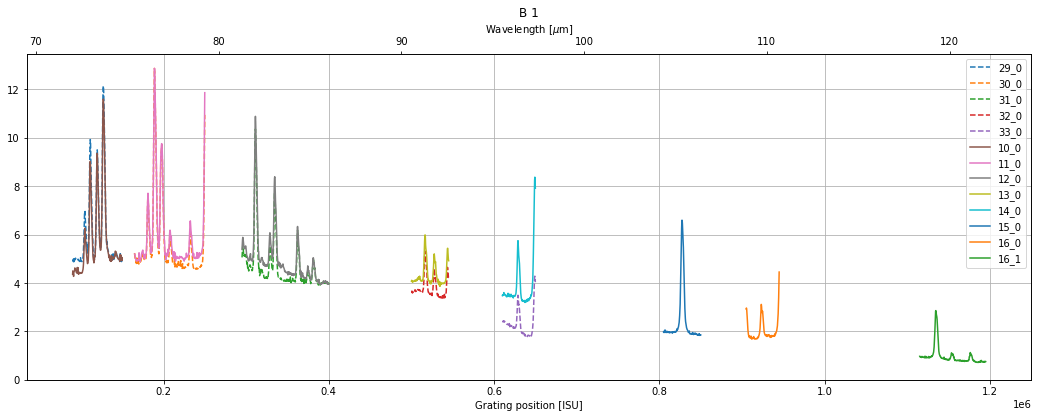

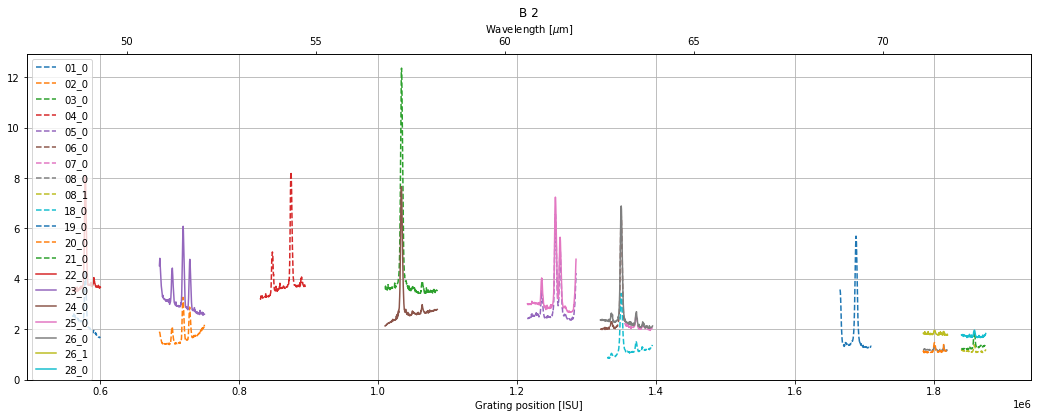

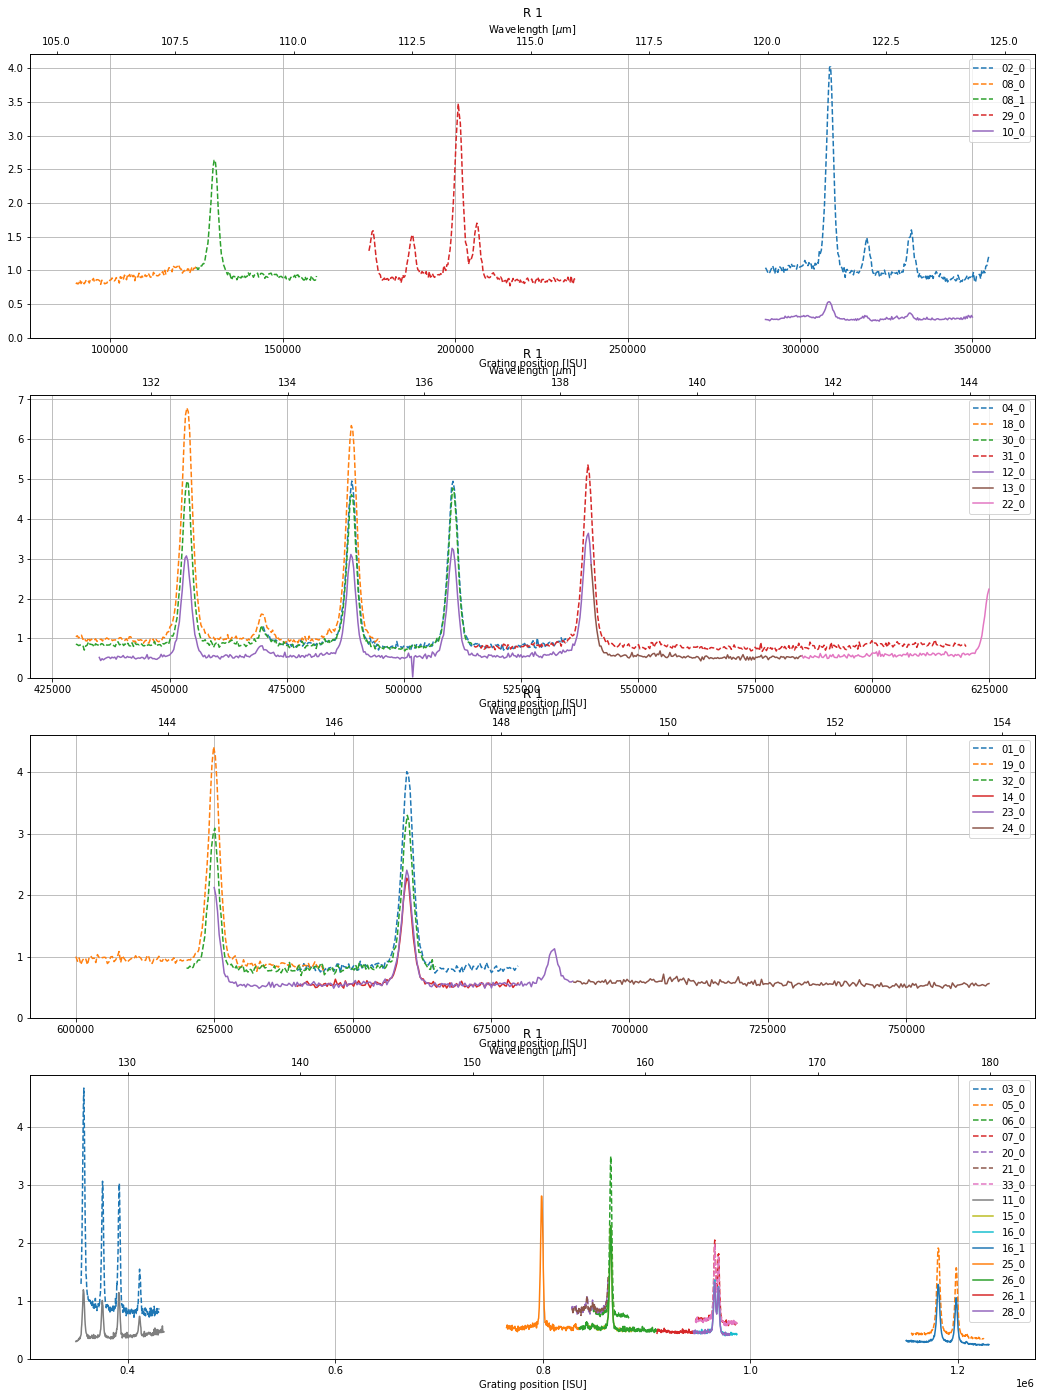

In [8]:
%matplotlib inline
from fifipy.wavecal import plotLines

rootdir = '/home/dario/FIFI-LS/Calibration/OC8M/wavcal/'
plotLines(rootdir,'B',1)
plotLines(rootdir,'B',2)
plotLines(rootdir,'R',1)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


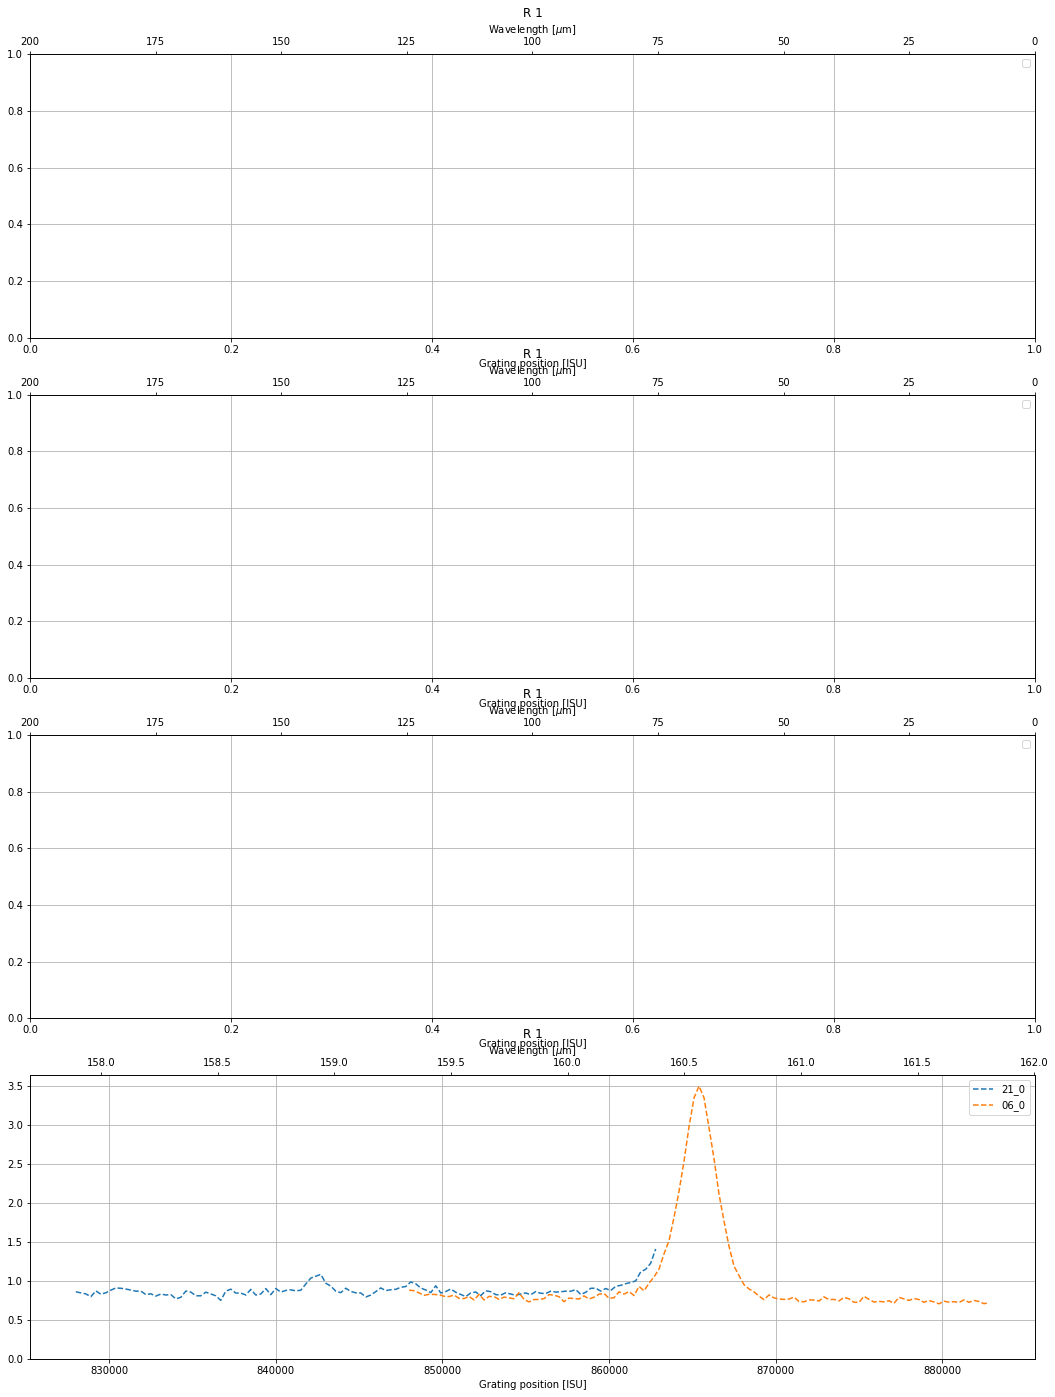

In [14]:
%matplotlib inline
from fifipy.wavecal import plotLines

rootdir = '/home/dario/FIFI-LS/Calibration/OC8M/wavcal/'
plotLines(rootdir,'R',1, files = [rootdir+'Reduced/R1_105_GC21_0.fits',rootdir+'Reduced/R1_105_GC06_0.fits'])


## Step 3. Merge files

In same cases an observation is done in two parts. These cases have to be merged before fitting the lines, otherwise the fitting is difficult and incorrect in some pixels.

In this case the blue seems OK.
The red has a few mergings:
- B    6_0 +  7_0 ->  6_1
- R    8_0 +  8_1 ->  8_2
- R   12_0 + 13_0 -> 12_1
- R   22_0 + 23_0 -> 22_1
- R   22_1 + 24_0 -> 22_2
- R    6_0 + 21_0 ->  6_1

In [16]:
from fifipy.wavecal import mergeFiles
rootdir = '/home/dario/FIFI-LS/Calibration/OC8M/wavcal/Reduced/'
infile1 = rootdir + 'B2_105_GC06_0.fits'
infile2 = rootdir + 'B2_105_GC07_0.fits'
outfile = rootdir + 'B2_105_GC06_1.fits'
mergeFiles(infile1, infile2, outfile)

In [17]:
from fifipy.wavecal import mergeFiles
rootdir = '/home/dario/FIFI-LS/Calibration/OC8M/wavcal/Reduced/'
infile1 = rootdir + 'R1_105_GC08_0.fits'
infile2 = rootdir + 'R1_105_GC08_1.fits'
outfile = rootdir + 'R1_105_GC08_2.fits'
mergeFiles(infile1, infile2, outfile)

In [18]:
from fifipy.wavecal import mergeFiles
rootdir = '/home/dario/FIFI-LS/Calibration/OC8M/wavcal/Reduced/'
infile1 = rootdir + 'R1_130_GC12_0.fits'
infile2 = rootdir + 'R1_130_GC13_0.fits'
outfile = rootdir + 'R1_130_GC12_1.fits'
mergeFiles(infile1, infile2, outfile)

In [19]:
from fifipy.wavecal import mergeFiles
rootdir = '/home/dario/FIFI-LS/Calibration/OC8M/wavcal/Reduced/'
infile1 = rootdir + 'R1_130_GC22_0.fits'
infile2 = rootdir + 'R1_130_GC23_0.fits'
outfile = rootdir + 'R1_130_GC22_1.fits'
mergeFiles(infile1, infile2, outfile)

In [20]:
from fifipy.wavecal import mergeFiles
rootdir = '/home/dario/FIFI-LS/Calibration/OC8M/wavcal/Reduced/'
infile1 = rootdir + 'R1_130_GC22_1.fits'
infile2 = rootdir + 'R1_130_GC24_0.fits'
outfile = rootdir + 'R1_130_GC22_2.fits'
mergeFiles(infile1, infile2, outfile)

In [21]:
#from fifipy.wavecal import mergeFiles
#rootdir = '/home/dario/FIFI-LS/Calibration/Wavelength/Reduced/'
#infile1 = rootdir + 'R1_105_GC06_0.fits'
#infile2 = rootdir + 'R1_105_GC21_0.fits'
#outfile = rootdir + 'R1_130_GC06_1.fits'
#mergeFiles(infile1, infile2, outfile)

Move unused files away.

In [22]:
import os
rootdir = '/home/dario/FIFI-LS/Calibration/OC8M/wavcal/Reduced/'
os.mkdir(rootdir+'OLD')

files = [
    'B2_105_GC06_0.fits',
    'B2_105_GC07_0.fits',
    'R1_105_GC08_0.fits',
    'R1_105_GC08_1.fits',
    'R1_130_GC12_0.fits',
    'R1_130_GC13_0.fits',
    'R1_130_GC22_0.fits',
    'R1_130_GC23_0.fits',
    'R1_130_GC22_1.fits',
    'R1_130_GC24_0.fits',
#    'R1_105_GC06_0.fits',
    'R1_105_GC21_0.fits',
#    'B2_105_GC08_0.fits',
#    'B2_105_GC08_1.fits',
#    'B2_130_GC26_1.fits',
#    'B2_130_GC28_0.fits',
]


for file in files:
    os.rename(rootdir+file, rootdir + 'OLD/'+file)

Double check

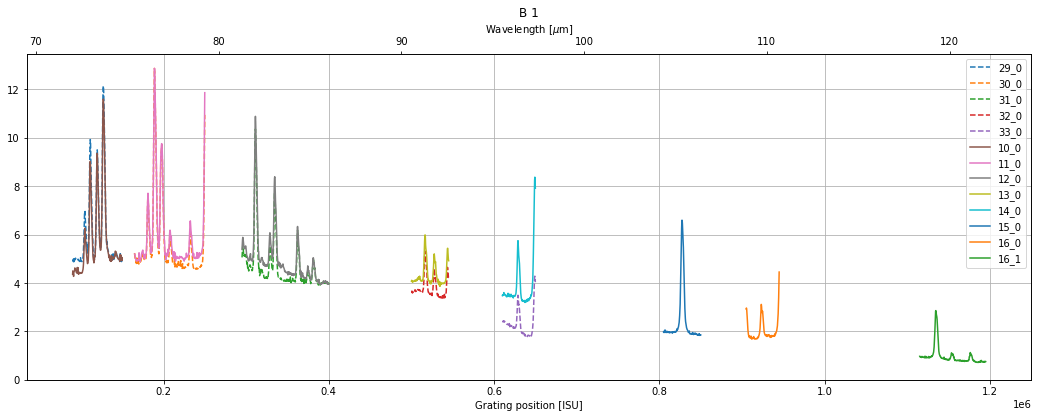

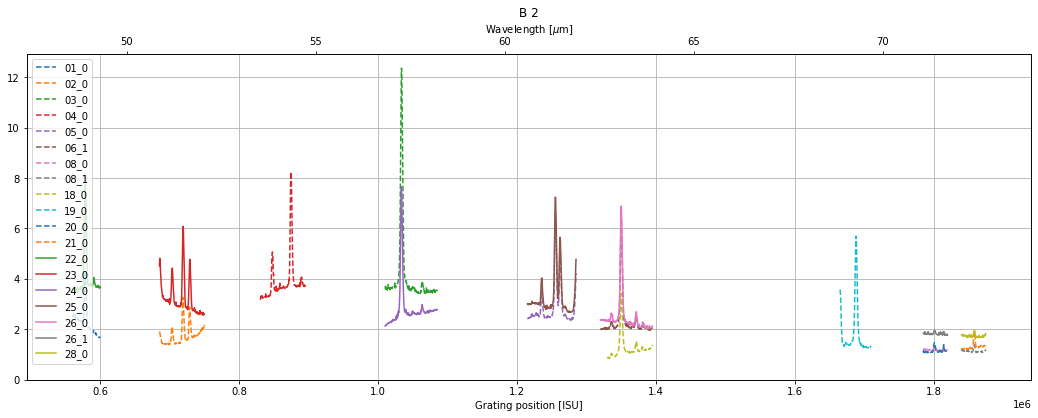

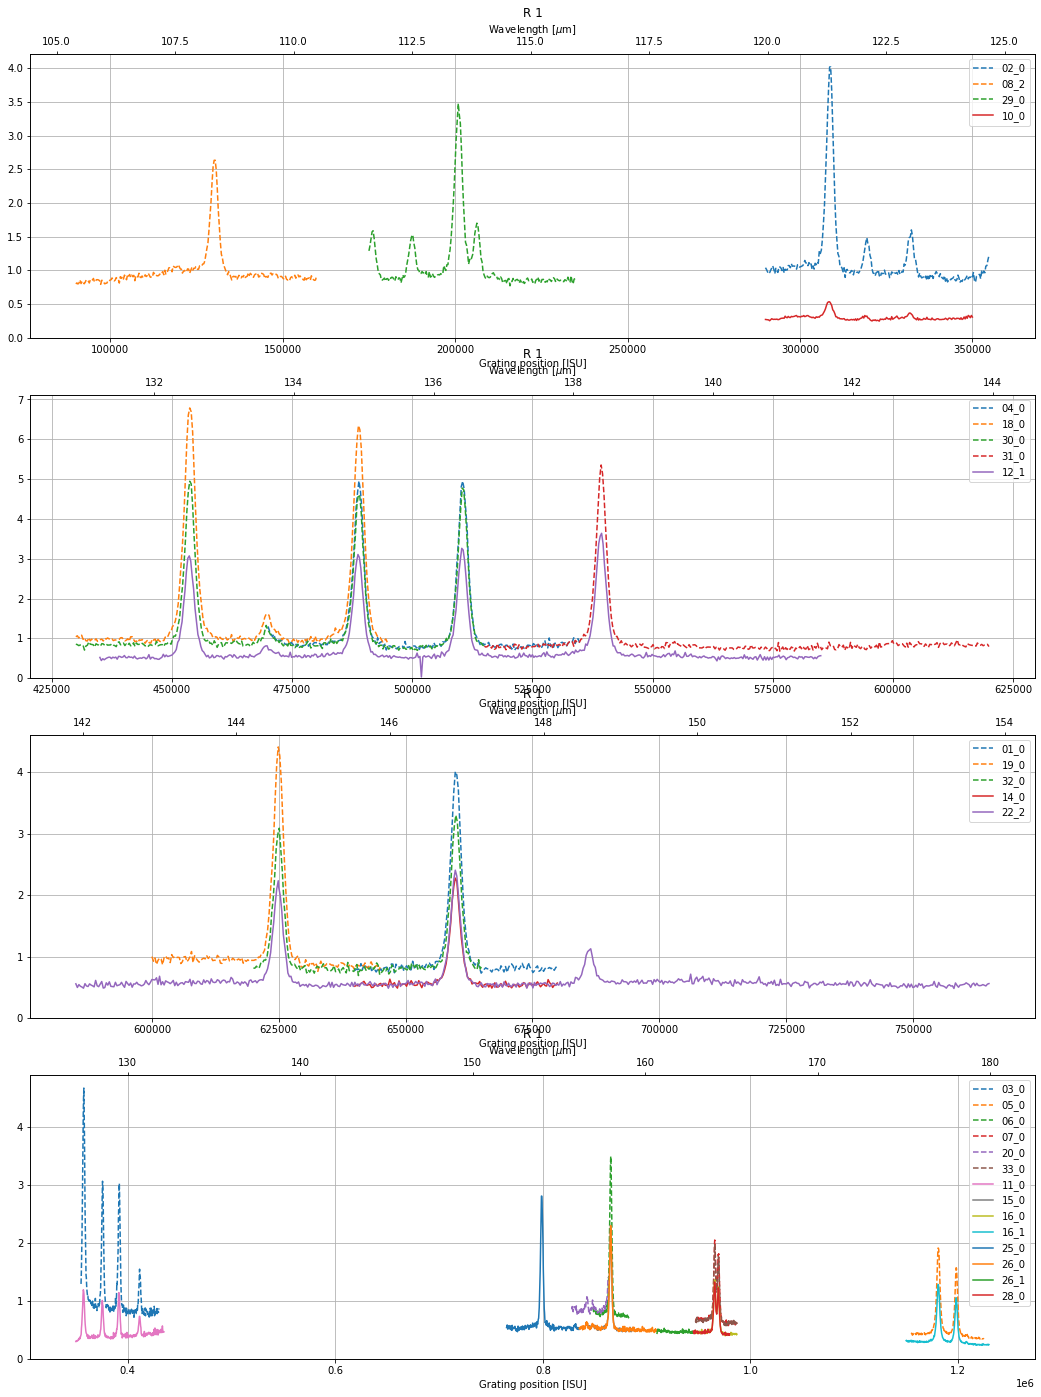

In [24]:
%matplotlib inline
from fifipy.wavecal import plotLines

rootdir = '/home/dario/FIFI-LS/Calibration/OC8M/wavcal/'
plotLines(rootdir,'B',1)
plotLines(rootdir,'B',2)
plotLines(rootdir,'R',1)

## Step 4. Fit the cubes

It is possible to fit a single cube and show the results.

```
%matplotlib inline
from fifipy.wavecal import fitData
rootdir = '../202002WaveCalData/Reduced/' 
infile = rootdir + 'R1_105_GC33_0.fits'
fitData(infile, plot=True)
```
Otherwise, the entire fitting can be done in one shot.
The results are conserved in pdf files with the same names which can be inspected to check the quality of the fits.

In [25]:
# Fit of all the data
from fifipy.wavecal import fitData
from glob import glob as gb
import os 
rootdir = '/home/dario/FIFI-LS/Calibration/OC8M/wavcal/Reduced/'
infiles = gb(os.path.join(rootdir,'*.fits'))
nfiles = len(infiles)
for k, infile in enumerate(infiles):
    print(str(nfiles-k)+' '+infile+' ', end='')
    fitData(infile, plot=False)
    print('')

60 /home/dario/FIFI-LS/Calibration/OC8M/wavcal/Reduced/B2_105_GC05_0.fits BLUE 2   ................
59 /home/dario/FIFI-LS/Calibration/OC8M/wavcal/Reduced/B2_105_GC04_0.fits BLUE 2   ................
58 /home/dario/FIFI-LS/Calibration/OC8M/wavcal/Reduced/R1_130_GC26_0.fits RED 1   ................
57 /home/dario/FIFI-LS/Calibration/OC8M/wavcal/Reduced/R1_105_GC06_0.fits RED 1   ................
56 /home/dario/FIFI-LS/Calibration/OC8M/wavcal/Reduced/B1_105_GC33_0.fits BLUE 1   ................
55 /home/dario/FIFI-LS/Calibration/OC8M/wavcal/Reduced/B2_105_GC01_0.fits BLUE 2   ................
54 /home/dario/FIFI-LS/Calibration/OC8M/wavcal/Reduced/R1_105_GC18_0.fits RED 1   ................
53 /home/dario/FIFI-LS/Calibration/OC8M/wavcal/Reduced/B2_105_GC03_0.fits BLUE 2   ................
52 /home/dario/FIFI-LS/Calibration/OC8M/wavcal/Reduced/R1_130_GC14_0.fits RED 1   ................
51 /home/dario/FIFI-LS/Calibration/OC8M/wavcal/Reduced/B2_130_GC25_0.fits BLUE 2   ................
50 /

##  Step 5. Fit the parameters

- For each case, run first the calibration with all free parameters (ISOFF is treated like a Gaussian with 3 params).
- Then fix the parameters to the best values except for ISOFF.
- Run the fit for each spaxel independently.

### R 105

Number of files  16


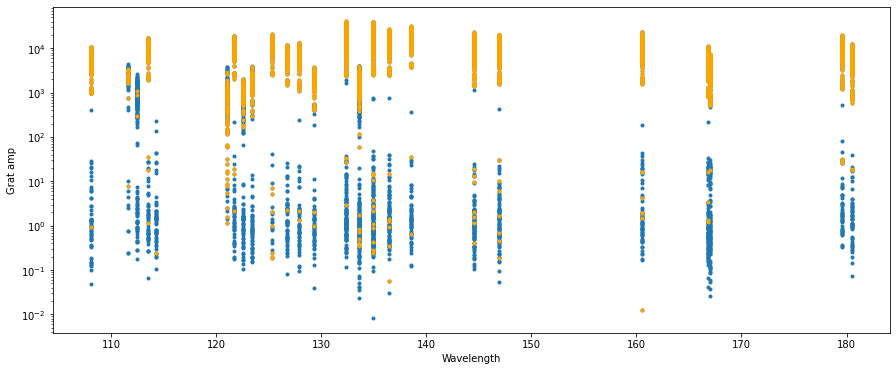

Number of files  16


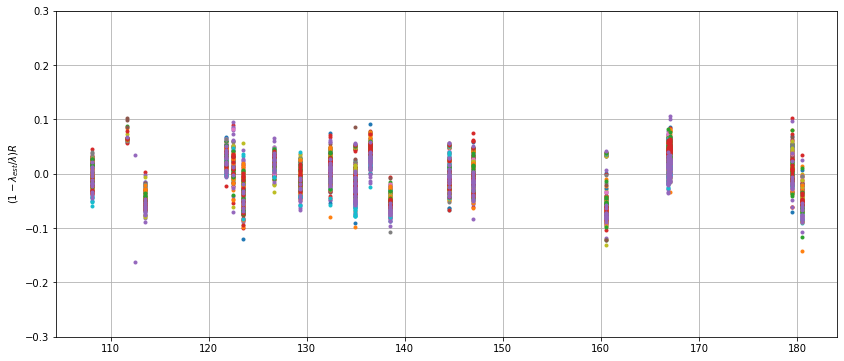

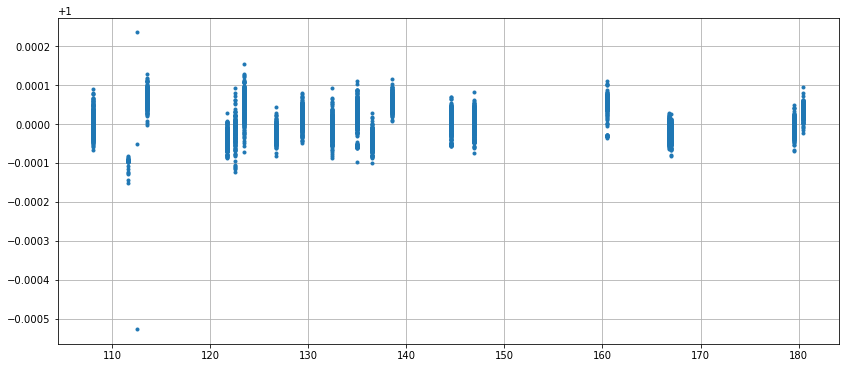

NP =  14.281477867535747
g0 =  0.11716155894877814
a  =  424.79738397452115
PS =  0.0005850751160858905
QS =  1.742082447102566e-06
QOFF =  5.976348864012902

ai =  6.422571100015846
bi =  -162.43614586172393
ci =  1150622.860584498


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from fifipy.wavecal import selectFiles
from fifipy.wavecal import computeWavCalTot
from fifipy.wavecal import plotQualityFit

rootdir = '/home/dario/FIFI-LS/Calibration/OC8M/wavcal/Reduced/'
channel = 'R'
order = '1'
dichroic = '105'
modules, pixel, wavepos, gerrpos, gratpos, gratamp, waveok, nfile = selectFiles(rootdir,channel, order, dichroic)
fig = plt.subplots(figsize=(15,6))
plt.plot(wavepos, gratamp,'.')
idx = (gerrpos < 100) 
plt.plot(wavepos[idx], gratamp[idx],'.',color='orange')
plt.ylabel('Grat amp')
plt.xlabel('Wavelength')
plt.yscale('log')
plt.show()

# Total fit
channel = 'R'
order = 1
dichroic = 105
idx = (gratamp > 80) & (gerrpos < 150) & (waveok == 1) 
out = computeWavCalTot(pixel[idx], modules[idx], wavepos[idx], gratpos[idx], channel, order, dichroic)
g0,NP,a,ai,bi,ci,PS,QOFF,QS = out
plotQualityFit(rootdir, 'R', '105', g0, NP, a, ai, bi, ci, PS, QS, QOFF)

# Printout variables
print('NP = ', NP)
print('g0 = ', g0)
print('a  = ', a)
print('PS = ', PS)
print('QS = ', QS)
print('QOFF = ', QOFF)
print('')
print('ai = ',ai)
print('bi = ',bi)
print('ci = ',ci)

ISOFF = [1150583.647,
1150728.753,nan,1151063.649,1151257.039,
1149945.110,1150001.709,1150100.493,1150187.087,
nan,1149563.520,1149554.316,1149570.416,
1149584.299,1149747.752,1149825.781,1149705.210,
1149641.695,1149572.299,1149736.012,nan,
1150350.657,1150198.631,1150053.704,1150214.676]
[25 26 27 28 29 19 20 21 22 23 13 14 15 16 17  7  8  9 10 11  1  2  3  4
  5]
ISOFF =  [1150583.64700414 1150728.75298609 1150903.76553625 1151063.64921424
 1151257.03936454 1149945.10970265 1150001.70899616 1150100.49283426
 1150187.0865951  1150366.50106011 1149563.52003455 1149554.31606748
 1149570.41618285 1149584.29934927 1149747.75162371 1149825.78114714
 1149705.20976448 1149641.69525917 1149572.29941132 1149736.01208038
 1150518.88957666 1150350.65668042 1150198.63131732 1150053.70444688
 1150214.67617768]


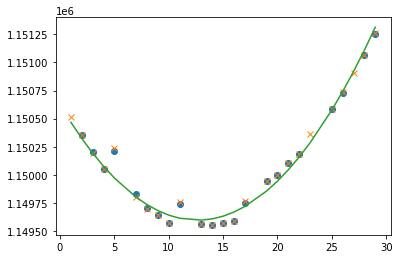

In [11]:
import numpy as np
from fifipy.wavecal import computeWavCal

# Fixed parameters
NP =  14.281477867535747
g0 =  0.11716155894877814
a  =  424.79738397452115
PS =  0.0005850751160858905
QS =  1.742082447102566e-06
QOFF =  5.976348864012902
# Fix the g
module = np.arange(25)
slitPos = 25 - 6 * (module // 5) + module % 5
g = g0 * (1 - 0.5 * ((slitPos - NP)/a)**2)

idx = (gratamp > 100) & (gerrpos < 100) & (waveok == 1) 
out = computeWavCal(pixel[idx], modules[idx], wavepos[idx], gratpos[idx]
                    ,'R',1
                    ,fixPS= PS
                    ,fixQS= QS
                    ,fixQOFF= QOFF
                    ,fixg = g
)
g_,gamma,QOFF_, PS_,QS_, ISOFF = out
print("ISOFF = [", end='')
for i, isoff in enumerate(ISOFF):
    if i < 24:
        if i % 4 == 0:
            print('{0:.3f},'.format(isoff))
        else:
            print('{0:.3f},'.format(isoff),end='')
    else:
        print('{0:.3f}]'.format(isoff))
#ai,bi,ci = fitISOFF(ISOFF, channel, dichroic, order)

# Plot ISOFF vs fit
ai =  6.422571100015846
bi =  -162.43614586172393
ci =  1150622.860584498
red105 = [ -7.82734595,    6.48103643,   15.37344189,   47.39558183,   54.25017651,
              -87.78073561,  -57.87672198,  -57.02387395,  -30.75647953,  -82.13171852,
               38.17407445,   53.9293801 ,   62.15816713,   82.60265586,  -51.04419029,
               -6.0626937,   36.28682384,   42.49162215,   70.33355788, -148.78530207,
              -52.04256692 , -29.12922045,   -4.73520485,   20.72545992, -268.51481606]

x = slitPos
s = np.argsort(x)
plt.plot(slitPos, ISOFF, 'o')
print(x)
fitISOFF = ai*x*x+bi*x+ci - red105
plt.plot(x, fitISOFF, 'x' )
x = x[s]
plt.plot(x, ai*x*x+bi*x+ci)

# Substitute NaNs
idx = np.isfinite(ISOFF)
if np.sum(~idx) > 0:
    ISOFF[~idx] = fitISOFF[~idx]
print('ISOFF = ', ISOFF)
# 
ISF = 1
gamma = 0.0167200
R105_pars = [g0,NP,a,ISF,gamma,PS,QOFF,QS,ISOFF]


### R 130

Number of files  12
Number of files  12


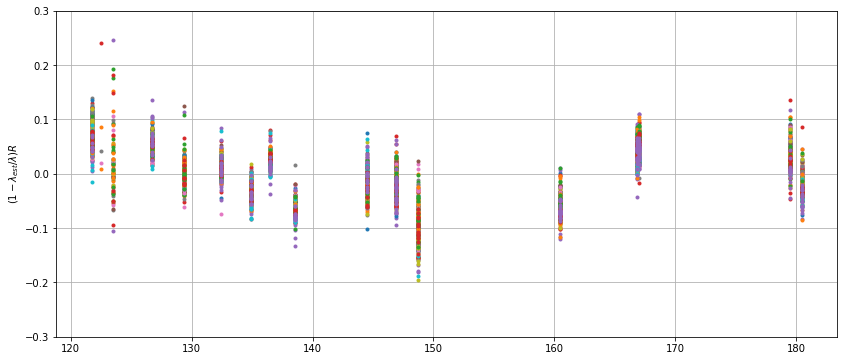

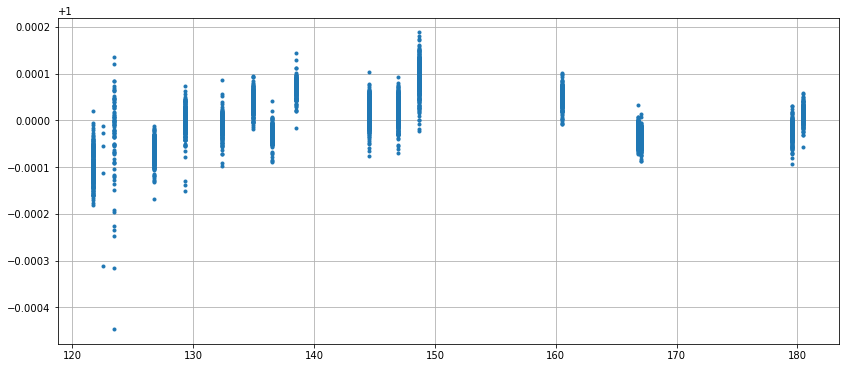

NP =  14.298352662977482
g0 =  0.11714909126578463
a  =  429.230699150466
PS =  0.0005872851048304014
QS =  1.3383439319664963e-06
QOFF =  5.645389421293297

ai =  6.2421698030683155
bi =  -157.5290600103757
ci =  1150942.6759034572


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from fifipy.wavecal import selectFiles
from fifipy.wavecal import computeWavCalTot
from fifipy.wavecal import plotQualityFit

rootdir = '/home/dario/FIFI-LS/Calibration/OC8M/wavcal/Reduced/'
channel = 'R'
order = '1'
dichroic = '130'
modules, pixel, wavepos, gerrpos, gratpos, gratamp, waveok, nfile = selectFiles(rootdir,channel, order, dichroic)

# Total fit
channel = 'R'
order = 1
dichroic = 130
idx = (gratamp > 80) & (gerrpos < 150) & (waveok == 1) 
out = computeWavCalTot(pixel[idx], modules[idx], wavepos[idx], gratpos[idx], channel, order,dichroic)
g0,NP,a,ai,bi,ci,PS,QOFF,QS = out
plotQualityFit(rootdir, 'R', '130', g0, NP, a, ai, bi, ci, PS, QS, QOFF)

# Printout variables
print('NP = ', NP)
print('g0 = ', g0)
print('a  = ', a)
print('PS = ', PS)
print('QS = ', QS)
print('QOFF = ', QOFF)
print('')
print('ai = ',ai)
print('bi = ',bi)
print('ci = ',ci)

ISOFF = [1150914.074,
1151055.201,nan,1151384.277,1151565.408,
1150298.024,1150349.549,1150451.345,1150533.117,
nan,1149922.834,1149909.343,1149929.227,
1149943.991,1150076.884,1150158.593,1150049.415,
1149990.169,1149924.729,1150074.759,nan,
1150680.311,1150536.380,1150398.787,1150522.591]
[25 26 27 28 29 19 20 21 22 23 13 14 15 16 17  7  8  9 10 11  1  2  3  4
  5]
ISOFF =  [1150914.0735661  1151055.20121201 1151221.401395   1151384.27745823
 1151565.4082161  1150298.0237897  1150349.54854405 1150451.34478012
 1150533.11724941 1150690.61268863 1149922.83398876 1149909.34275731
 1149929.22693911 1149943.99056724 1150076.88372911 1150158.59325771
 1150049.41510549 1149990.16884061 1149924.7288219  1150074.75905654
 1150839.26437865 1150680.3106972  1150536.37969581 1150398.78696102
 1150522.59082076]


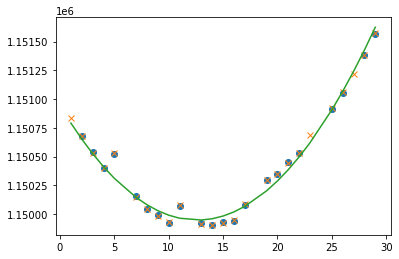

In [13]:
import numpy as np
from fifipy.wavecal import computeWavCal

# Fixed parameters
NP =  14.298352662977482
g0 =  0.11714909126578463
a  =  429.230699150466
PS =  0.0005872851048304014
QS =  1.3383439319664963e-06
QOFF =  5.645389421293297
# Fix the g
module = np.arange(25)
slitPos = 25 - 6 * (module // 5) + module % 5
g = g0 * (1 - 0.5 * ((slitPos - NP)/a)**2)

idx = (gratamp > 100) & (gerrpos < 100) & (waveok == 1) 
out = computeWavCal(pixel[idx], modules[idx], wavepos[idx], gratpos[idx]
                    ,'R',1
                    ,fixPS= PS
                    ,fixQS= QS
                    ,fixQOFF= QOFF
                    ,fixg = g
)
g_,gamma,QOFF_, PS_,QS_, ISOFF = out
print("ISOFF = [", end='')
for i, isoff in enumerate(ISOFF):
    if i < 24:
        if i % 4 == 0:
            print('{0:.3f},'.format(isoff))
        else:
            print('{0:.3f},'.format(isoff),end='')
    else:
        print('{0:.3f}]'.format(isoff))

# Plot ISOFF vs fit
ai =  6.2421698030683155
bi =  -157.5290600103757
ci =  1150942.6759034572

red130 = [ -12.70859072,    7.50024661,   18.53167461,   41.46400465,   52.7757175,
              -95.78015715,  -56.53938436,  -54.24399594,  -33.75992799,  -68.99733959,
               31.27967525,   53.60554151,   58.10103624,   71.69960587,  -22.11761283,
               -4.64846212 ,  38.77585613,   42.34325365,   60.40053434, -118.02749666,
              -47.8753654 ,  -24.45939546,   -4.54977914,    8.74871326, -223.38722927]

x = slitPos
s = np.argsort(x)
plt.plot(slitPos, ISOFF, 'o')
print(x)
fitISOFF = ai*x*x+bi*x+ci - red130
plt.plot(x, fitISOFF, 'x' )
x = x[s]
plt.plot(x, ai*x*x+bi*x+ci)

# Substitute NaNs
idx = np.isfinite(ISOFF)
if np.sum(~idx) > 0:
    ISOFF[~idx] = fitISOFF[~idx]
print('ISOFF = ', ISOFF)
# 
ISF = 1
gamma = 0.0167200
R130_pars = [g0,NP,a,ISF,gamma,PS,QOFF,QS,ISOFF]


### B 1

Number of files  13
Number of files  13


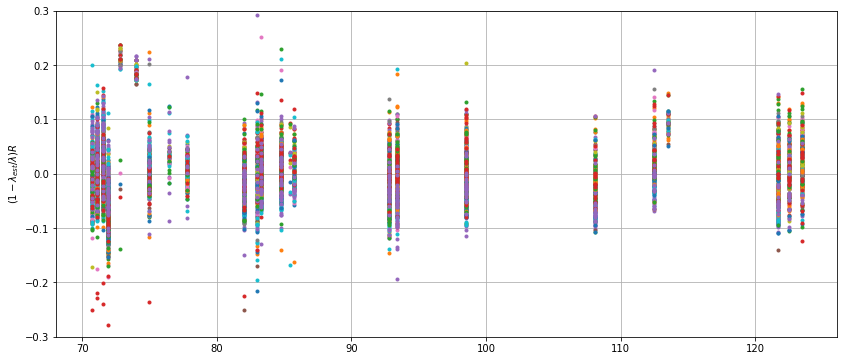

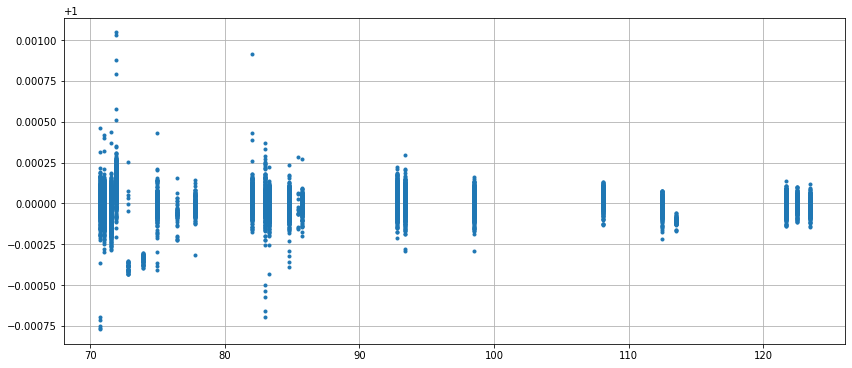

NP =  14.000969424225573
g0 =  0.08265525293458159
a  =  875.4232315487271
PS =  0.0005502448610965982
QS =  1.0507424216361979e-05
QOFF =  6.598611082319248

ai =  1.962517048870258
bi =  -50.808462854101236
ci =  1074885.4826426136


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from fifipy.wavecal import selectFiles
from fifipy.wavecal import computeWavCalTot
from fifipy.wavecal import plotQualityFit

rootdir = '/home/dario/FIFI-LS/Calibration/OC8M/wavcal/Reduced/'
channel = 'B'
order = '1'
dichroic = '130'
modules, pixel, wavepos, gerrpos, gratpos, gratamp, waveok, nfile = selectFiles(rootdir,channel, order, dichroic)

# Total fit
channel = 'B'
order = 1
dichroic = 130
idx = (gratamp > 80) & (gerrpos < 150) & (waveok == 1) 
out = computeWavCalTot(pixel[idx], modules[idx], wavepos[idx], gratpos[idx], channel, order, dichroic)
g0,NP,a,ai,bi,ci,PS,QOFF,QS = out
plotQualityFit(rootdir, 'B1', '130', g0, NP, a, ai, bi, ci, PS, QS, QOFF)
# Printout variables
print('NP = ', NP)
print('g0 = ', g0)
print('a  = ', a)
print('PS = ', PS)
print('QS = ', QS)
print('QOFF = ', QOFF)
print('')
print('ai = ',ai)
print('bi = ',bi)
print('ci = ',ci)

ISOFF = [1075088.689,
1074957.114,1074951.553,1074962.168,1074612.637,
1074789.880,1074696.250,1074724.910,1074694.950,
1074413.124,1074691.418,1074596.263,1074546.287,
1074553.855,1074351.081,1074663.827,1074568.291,
1074569.494,1074564.541,1074333.805,1074934.954,
1074802.095,1074732.355,1074731.629,1074494.463]
[25 26 27 28 29 19 20 21 22 23 13 14 15 16 17  7  8  9 10 11  1  2  3  4
  5]
ISOFF =  [1075088.68911167 1074957.11370617 1074951.55342445 1074962.168103
 1074612.63720506 1074789.87979996 1074696.25037245 1074724.91036284
 1074694.94990624 1074413.12383753 1074691.41823772 1074596.26251415
 1074546.28728294 1074553.85497062 1074351.0809187  1074663.82677007
 1074568.29097747 1074569.49370151 1074564.54118017 1074333.80548926
 1074934.95385034 1074802.09489277 1074732.35450775 1074731.62882188
 1074494.46321691]


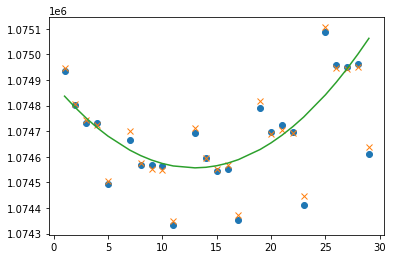

In [17]:
import numpy as np
from fifipy.wavecal import computeWavCal

# Fixed parameters
NP =  14.000969424225573
g0 =  0.08265525293458159
a  =  875.4232315487271
PS =  0.0005502448610965982
QS =  1.0507424216361979e-05
QOFF =  6.598611082319248
# Fix the g
module = np.arange(25)
slitPos = 25 - 6 * (module // 5) + module % 5
g = g0 * (1 - 0.5 * ((slitPos - NP)/a)**2)

idx = (gratamp > 100) & (gerrpos < 100) & (waveok == 1) 
out = computeWavCal(pixel[idx], modules[idx], wavepos[idx], gratpos[idx]
                    ,'B',1
                    ,fixPS= PS
                    ,fixQS= QS
                    ,fixQOFF= QOFF
                    ,fixg = g
)
g_,gamma,QOFF_, PS_,QS_, ISOFF = out
print("ISOFF = [", end='')
for i, isoff in enumerate(ISOFF):
    if i < 24:
        if i % 4 == 0:
            print('{0:.3f},'.format(isoff))
        else:
            print('{0:.3f},'.format(isoff),end='')
    else:
        print('{0:.3f}]'.format(isoff))

# Plot ISOFF vs fit
ai =  1.962517048870258
bi =  -50.808462854101236
ci =  1074885.4826426136
blue1 = [-263.92944121,  -53.59084654,    1.16697799,   51.19513828,  422.65026353,
             -189.63033763,  -33.17725668,  -19.96267952,   26.01302266,  307.31828786,
             -156.31979898,  -37.76920495,   14.25657713,    9.02851029,  216.42404114,
              -75.57154681,   28.56399698,   33.54483603,   24.91445915,  215.17805003,
             -108.48468372,  -12.59286879,    6.90170244,  -10.74710888,  175.93175233]

x = slitPos
s = np.argsort(x)
plt.plot(slitPos, ISOFF, 'o')
print(x)
fitISOFF = ai*x*x+bi*x+ci - blue1
plt.plot(x, fitISOFF, 'x' )
x = x[s]
plt.plot(x, ai*x*x+bi*x+ci)

# Substitute NaNs
idx = np.isfinite(ISOFF)
if np.sum(~idx) > 0:
    ISOFF[~idx] = fitISOFF[~idx]
print('ISOFF = ', ISOFF)
# 
ISF = 1
gamma = 0.0089008
B1_pars = [g0,NP,a,ISF,gamma,PS,QOFF,QS,ISOFF ]


### B 2

Number of files  19
Number of files  19


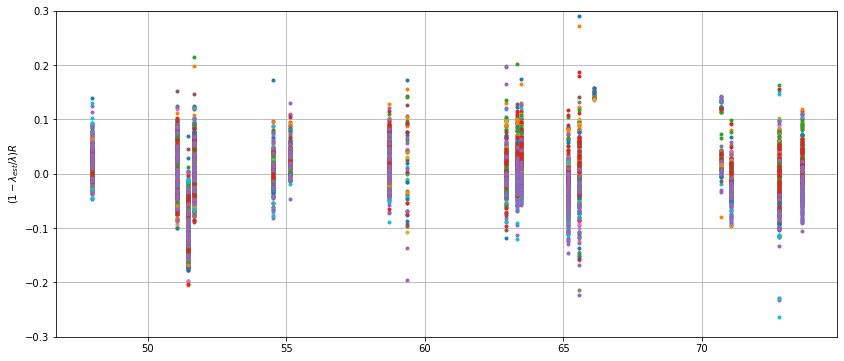

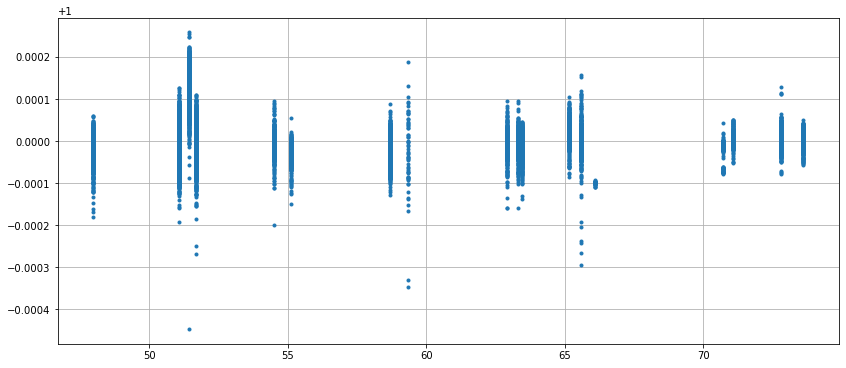

NP =  14.486848867033109
g0 =  0.08266355683865093
a  =  820.4265436688399
PS =  0.0005564284889367475
QS =  7.81549843292306e-06
QOFF =  6.522879477039675

ai =  1.9853206957130822
bi =  -52.470530986457305
ci =  1074722.3057768245


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from fifipy.wavecal import selectFiles
from fifipy.wavecal import computeWavCalTot
from fifipy.wavecal import plotQualityFit

rootdir = '/home/dario/FIFI-LS/Calibration/OC8M/wavcal/Reduced/'
channel = 'B'
order = '2'
dichroic = '130'
modules, pixel, wavepos, gerrpos, gratpos, gratamp, waveok, nfile = selectFiles(rootdir,channel, order, dichroic)

# Total fit
channel = 'B'
order = 2
dichroic = 130
idx = (gratamp > 80) & (gerrpos < 150) & (waveok == 1) 
out = computeWavCalTot(pixel[idx], modules[idx], wavepos[idx], gratpos[idx], channel, order,dichroic)
g0,NP,a,ai,bi,ci,PS,QOFF,QS = out
plotQualityFit(rootdir, 'B2', '130', g0, NP, a, ai, bi, ci, PS, QS, QOFF)
# Printout variables
print('NP = ', NP)
print('g0 = ', g0)
print('a  = ', a)
print('PS = ', PS)
print('QS = ', QS)
print('QOFF = ', QOFF)
print('')
print('ai = ',ai)
print('bi = ',bi)
print('ci = ',ci)

ISOFF = [1074820.374,
1074770.683,1074777.608,1074766.055,1074363.530,
1074571.330,1074520.840,1074549.750,1074519.770,
1074178.372,1074464.364,1074419.154,1074397.879,
1074397.810,1074119.172,1074463.307,1074404.133,
1074380.657,1074360.584,1074095.610,1074737.039,
1074640.592,1074586.264,1074561.193,1074241.911]
[25 26 27 28 29 19 20 21 22 23 13 14 15 16 17  7  8  9 10 11  1  2  3  4
  5]
ISOFF =  [1074820.37396864 1074770.68264866 1074777.60805312 1074766.05536595
 1074363.53030314 1074571.33036579 1074520.83952702 1074549.7500857
 1074519.76962861 1074178.37224438 1074464.36417742 1074419.15400808
 1074397.87903166 1074397.80960812 1074119.17163303 1074463.30702585
 1074404.13282354 1074380.65743886 1074360.58356822 1074095.60965073
 1074737.03921322 1074640.59239218 1074586.26364746 1074561.19282344
 1074241.91101388]


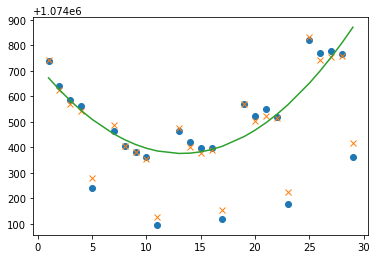

In [21]:
import numpy as np
from fifipy.wavecal import computeWavCal

# Fixed parameters
NP =  14.486848867033109
g0 =  0.08266355683865093
a  =  820.4265436688399
PS =  0.0005564284889367475
QS =  7.81549843292306e-06
QOFF =  6.522879477039675
# Fix the g
module = np.arange(25)
slitPos = 25 - 6 * (module // 5) + module % 5
g = g0 * (1 - 0.5 * ((slitPos - NP)/a)**2)

idx = (gratamp > 100) & (gerrpos < 100) & (waveok == 1) 
out = computeWavCal(pixel[idx], modules[idx], wavepos[idx], gratpos[idx]
                    ,'B',2
                    ,fixPS= PS
                    ,fixQS= QS
                    ,fixQOFF= QOFF
                    ,fixg = g
)
g_,gamma,QOFF_, PS_,QS_, ISOFF = out
print("ISOFF = [", end='')
for i, isoff in enumerate(ISOFF):
    if i < 24:
        if i % 4 == 0:
            print('{0:.3f},'.format(isoff))
        else:
            print('{0:.3f},'.format(isoff),end='')
    else:
        print('{0:.3f}]'.format(isoff))

# Plot ISOFF vs fit
ai =  1.9853206957130822
bi =  -52.470530986457305
ci =  1074722.3057768245

blue2 = [-1.80111492e+02, -4.09611668e+01,  1.78797557e-02,  5.33911505e+01,
              4.51898768e+02, -1.28648267e+02, -3.41402874e+01, -2.58367960e+01,
              1.51806221e+01,  3.40600043e+02, -1.00297089e+02, -2.52445624e+01,
              4.35994998e+00,  3.34233424e+00,  2.48134145e+02, -3.43214702e+01,
              2.64531668e+01,  2.99021981e+01,  4.11197888e+01,  2.59380351e+02,
             -6.88399816e+01, -1.68668733e-01,  1.23190431e+01,  3.38400050e+00,
              2.28956503e+02]
x = slitPos
s = np.argsort(x)
plt.plot(slitPos, ISOFF, 'o')
print(x)
fitISOFF = ai*x*x+bi*x+ci - blue2
plt.plot(x, fitISOFF, 'x' )
x = x[s]
plt.plot(x, ai*x*x+bi*x+ci)

# Substitute NaNs
idx = np.isfinite(ISOFF)
if np.sum(~idx) > 0:
    ISOFF[~idx] = fitISOFF[~idx]
print('ISOFF = ', ISOFF)
# 
ISF = 1
gamma = 0.0089008
B2_pars = [g0,NP,a,ISF,gamma,PS,QOFF,QS,ISOFF ]

# Output

In [39]:
# Print the parameters
print(',2105,,,')
header = ',Red D105,    Red D130,   Blue 1st Order,Blue 2nd Order'
print(header)
parametes  = ['g0','NP','a','ISF','gamma','PS','QOFF','QS','ISOFF'] 
for r105, r130, b1, b2 in zip(R105_pars[:-1], R130_pars[:-1], B1_pars[:-1], B2_pars[:-1]):
    print(',{0:.5e}, {1:.5e}, {2:.5e}, {3:.5e}'.format(r105, r130, b1 ,b2))
for i, (r105, r130, b1, b2) in enumerate(zip(R105_pars[-1], R130_pars[-1], B1_pars[-1], B2_pars[-1])):
    print(',{1:.3f}, {2:.3f}, {3:.3f}, {4:.3f}'.format(i,r105, r130, b1, b2))

,2105,,,
,Red D105,    Red D130,   Blue 1st Order,Blue 2nd Order
,1.17162e-01, 1.17149e-01, 8.26553e-02, 8.26636e-02
,1.42815e+01, 1.42984e+01, 1.40010e+01, 1.44868e+01
,4.24797e+02, 4.29231e+02, 8.75423e+02, 8.20427e+02
,1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00
,1.67200e-02, 1.67200e-02, 8.90080e-03, 8.90080e-03
,5.85075e-04, 5.87285e-04, 5.50245e-04, 5.56428e-04
,5.97635e+00, 5.64539e+00, 6.59861e+00, 6.52288e+00
,1.74208e-06, 1.33834e-06, 1.05074e-05, 7.81550e-06
,1150583.647, 1150914.074, 1075088.689, 1074820.374
,1150728.753, 1151055.201, 1074957.114, 1074770.683
,1150903.766, 1151221.401, 1074951.553, 1074777.608
,1151063.649, 1151384.277, 1074962.168, 1074766.055
,1151257.039, 1151565.408, 1074612.637, 1074363.530
,1149945.110, 1150298.024, 1074789.880, 1074571.330
,1150001.709, 1150349.549, 1074696.250, 1074520.840
,1150100.493, 1150451.345, 1074724.910, 1074549.750
,1150187.087, 1150533.117, 1074694.950, 1074519.770
,1150366.501, 1150690.613, 1074413.124, 1074178.372

In [40]:
# Write an output file with all the parameters [Old format]
rootdir = '/home/dario/FIFI-LS/Calibration/OC8M/wavcal/'
with open(rootdir+'old_parameters.csv', 'w') as f:
    f.write(',2105,,,\n')
    header = ',Red D105,    Red D130,   Blue 1st Order,Blue 2nd Order\n'
    f.write(header)
    #parametes  = ['g0','NP','a','ISF','gamma','PS','QOFF','QS','ISOFF'] 
    for r105, r130, b1, b2 in zip(R105_pars[:-1], R130_pars[:-1], B1_pars[:-1], B2_pars[:-1]):
        f.write(',{0:.5e}, {1:.5e}, {2:.5e}, {3:.5e}\n'.format(r105, r130, b1 ,b2))
    for i, (r105, r130, b1, b2) in enumerate(zip(R105_pars[-1], R130_pars[-1], B1_pars[-1], B2_pars[-1])):
        f.write(',{1:.3f}, {2:.3f}, {3:.3f}, {4:.3f}\n'.format(i,r105, r130, b1, b2))

In [41]:
# Write an output file with all the parameters [New format]
rootdir = '/home/dario/FIFI-LS/Calibration/OC8M/wavcal/'
with open(rootdir+'parameters.csv', 'w') as f:
    f.write('date, channel, g0,NP,a,ISF,gamma,PS,QOFF,QS,')
    for i in range(1,25):
        f.write('ISOFF'+str(i)+',')
    f.write('ISOFF25\n')
    f.write('# 2105\n')
    for channel, pars in zip(['R105','R130','B1','B2'], [R105_pars, R130_pars, B1_pars, B2_pars]):
        f.write('20210501, '+channel)
        for p in pars[:-1]:
            f.write(', {0:.5e}'.format(p))
        for p in pars[-1]:
            f.write(', {0:.3f}'.format(p))
        f.write('\n')

# Comparison with Sebastian's code outputs

Number of files  13


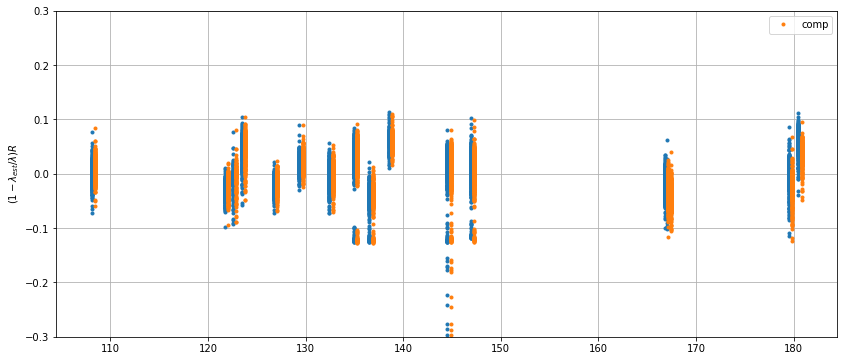

In [2]:
# Quality fit  R 105
from fifipy.wavecal import plotQualityFit

rootdir = '/home/dario/FIFI-LS/Calibration/2104/Wavelength/Reduced/'
g0, NP, a, ISF, gamma, PS, QOFF, QS = 1.1715871E-01, 14.2957, 424.5872, 1, 1.6720E-02, 5.8725E-04, 6.0183, 1.4623E-06
ISOFF = [
1150710,1150861,1151017,1151191,1151388,
1150076,1150129,1150231,1150317,1150492,
1149693,1149686,1149702,1149716,1149894,
1149947,1149832,1149773,1149703,1149879,
1150638,1150484,1150330,1150189,1150364]
comparison = [g0,NP,a,ISF,gamma,PS,QOFF,QS,ISOFF]

PS= 0.0005623551638466355
QS= 7.054851166419904e-06
QOFF= 6.47335176583576


g0 =  0.1171633758330621
NP =  14.178326387392923
a  =  422.18076289588214
ai =  6.512935550395305
bi =  -163.9069987186168
ci =  1150678.8060338225
plotQualityFit(rootdir, 'R', '105', g0, NP, a, ai, bi, ci, PS, QS, QOFF, comparison=comparison)

Number of files  13


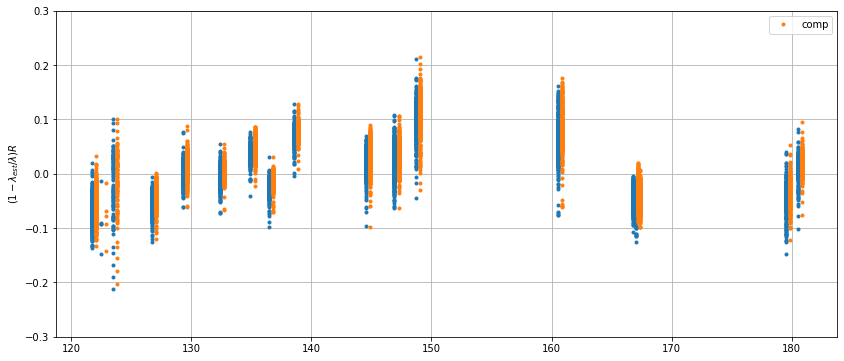

In [6]:
# Quality fit R 130
from fifipy.wavecal import plotQualityFit

rootdir = '/home/dario/FIFI-LS/Calibration/Wavelength/Reduced/'
g0, NP, a, ISF, gamma, PS, QOFF, QS = 1.1714730E-01,14.2773,426.2978,1,1.6720E-02,5.8698E-04,6.2534,1.6322E-06
ISOFF = [
1151055,1151198,1151345,1151528,
1151720,1150429,1150471,1150573,
1150664,1150826,1150044,1150029,
1150051,1150071,1150209,1150280,
1150168,1150114,1150052,1150194,
1150968,1150805,1150659,1150528,
1150652]
comparison = [g0,NP,a,ISF,gamma,PS,QOFF,QS,ISOFF ]

PS= 0.0005862310900975839
QS= 1.3313419300753522e-06
QOFF= 5.9938919760772436
g0 =  0.11714673987584129
NP =  14.270488265644591
a  =  428.7258347154288
ai =  6.272615053064202
bi =  -158.09417559774786
ci =  1151055.6130255344

plotQualityFit(rootdir, 'R', '130', g0, NP, a, ai, bi, ci, PS, QS, QOFF, comparison=comparison)

Number of files  13


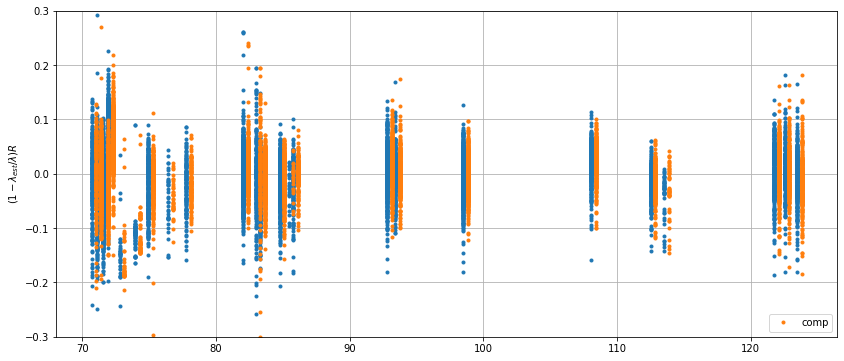

In [33]:
# Quality fit  B1
from fifipy.wavecal import plotQualityFit
rootdir = '/home/dario/FIFI-LS/Calibration/Wavelength/Reduced/'
g0, NP, a, ISF, gamma, PS, QOFF, QS = 8.2657169E-02, 13.8614, 779.1903, 1, 8.9008E-03, 5.5322E-04, 6.9018, 1.0950E-05
ISOFF = [
1075436,1075185,1075171,1075206,1075071,
1075091,1074865,1074880,1074879,1074790,
1074970,1074755,1074699,1074717,1074643,
1074931,1074730,1074691,1074690,1074600,
1075208,1074988,1074903,1074883,1074771
]
comparison = [g0,NP,a,ISF,gamma,PS,QOFF,QS,ISOFF ]

PS= 0.0005553090115390978
QS= 1.021566786071544e-05
QOFF= 6.819409083954833
g0 =  0.08265580961111949
NP =  15.589921075837095
a  =  1106.0128637698215
ai =  1.458258918996828
bi =  -39.3811391326291
ci =  1075053.1704249806
plotQualityFit(rootdir, 'B1', '105', g0, NP, a, ai, bi, ci, PS, QS, QOFF, comparison=comparison)

Number of files  16


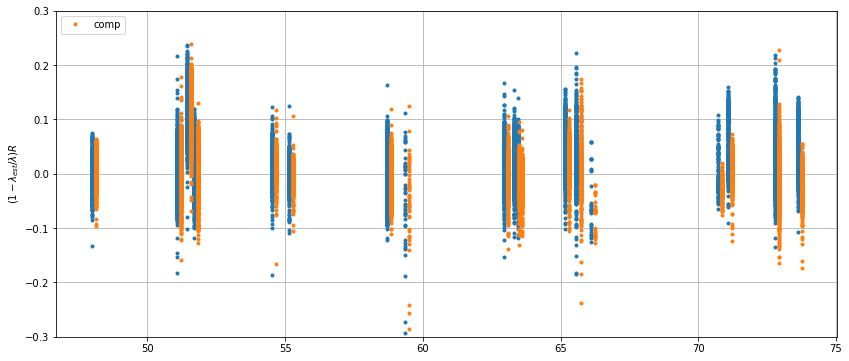

In [18]:
# Quality fit  B2
from fifipy.wavecal import plotQualityFit
rootdir = '/home/dario/FIFI-LS/Calibration/2104/Wavelength/Reduced/'
g0, NP, a, ISF, gamma, PS, QOFF, QS = 8.2660993E-02, 14.4470, 756.7554, 1, 8.9008E-03, 5.5828E-04, 6.5249, 7.5353E-06
ISOFF = [
1075346,1075121,1075139,1075166,1075013,
1074995,1074823,1074845,1074847,1074732,
1074879,1074702,1074669,1074687,1074587,
1074882,1074698,1074671,1074654,1074525,
1075190,1074960,1074897,1074869,1074720]
comparison = [g0,NP,a,ISF,gamma,PS,QOFF,QS,ISOFF ]
PS= 0.0005623551638466355
QS= 7.054851166419904e-06
QOFF= 6.47335176583576
g0 =  0.08266539664691198
NP =  14.78408354453021
a  =  813.902445095245
ai =  2.103450276372124
bi =  -55.86010999189705
ci =  1074854.7414309909

ISOFF = [1075310.034,
1074908.339,1074914.768,1074905.383,1074898.549,
1074967.508,1074662.128,1074660.247,1074653.208,
1074680.565,1074876.390,1074553.924,1074515.462,
1074533.701,1074544.524,1074827.684,1074536.815,
1074517.494,1074489.871,1074471.427,1075114.033,
1074778.023,1074726.939,1074676.594,1074667.072]

PS= 0.0005615789735759569
QS= 7.250465870501234e-06
QOFF= 6.506403787295611

g0 =  0.08266462879308117
NP =  14.792515368735899
a  =  821.2198489606849

ai =  2.050504476559398
bi =  -53.56358148591927
ci =  1074858.71892076

plotQualityFit(rootdir, 'B2', '105', g0, NP, a, ai, bi, ci, PS, QS, QOFF, ISOFF=ISOFF, comparison=comparison)

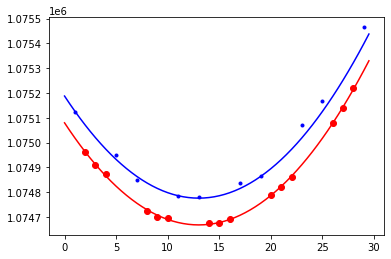

[25 26 27 28 29 19 20 21 22 23 13 14 15 16 17  7  8  9 10 11  1  2  3  4
  5]
[0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4]


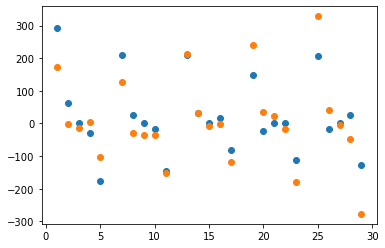

In [70]:
module = np.arange(25)
slitPos = 25 - 6 * (module // 5) + module % 5
ISOFF = np.array([
1075346,1075121,1075139,1075166,1075013,
1074995,1074823,1074845,1074847,1074732,
1074879,1074702,1074669,1074687,1074587,
1074882,1074698,1074671,1074654,1074525,
1075190,1074960,1074897,1074869,1074720])
blue2 = np.array([-1.80111492e+02, -4.09611668e+01,  1.78797557e-02,  5.33911505e+01,
              4.51898768e+02, -1.28648267e+02, -3.41402874e+01, -2.58367960e+01,
              1.51806221e+01,  3.40600043e+02, -1.00297089e+02, -2.52445624e+01,
              4.35994998e+00,  3.34233424e+00,  2.48134145e+02, -3.43214702e+01,
              2.64531668e+01,  2.99021981e+01,  4.11197888e+01,  2.59380351e+02,
             -6.88399816e+01, -1.68668733e-01,  1.23190431e+01,  3.38400050e+00,
              2.28956503e+02])

plt.plot(slitPos, ISOFF+blue2,'.',color='blue')
#plt.plot(slitPos, ISOFF, '.', color='red')

from lmfit.models import QuadraticModel
mod = QuadraticModel()
x = slitPos.copy()
y = ISOFF + blue2
idx = [1,2,3,6,7,8,11,12,13,16,17,18,21,22,23]
plt.plot(slitPos[idx], ISOFF[idx]+blue2[idx], 'o', color='red')
pars = mod.guess(y[idx], x=x[idx])
out = mod.fit(y[idx], pars, x=x[idx])
a,b,c = out.params['a'].value,out.params['b'].value,out.params['c'].value
x_=np.arange(0, 30, 0.5)
plt.plot(x_, a*x_**2+b*x_+c, color='red')
plt.plot(x_, a*x_**2+b*x_+c+108, color='blue')
plt.show()

xx = slitPos
print(slitPos)
print((slitPos-1)%6)

dx = (slitPos-1)%6
ix = np.arange(25)
dx = np.array([2,1,0,-1,-2]*5)
#plt.plot(slitPos, ISOFF, 'o')
x_ = slitPos.copy()
y_ = a*x_**2+b*x_+c
plt.plot(slitPos, ISOFF - ISOFF[ix + dx],'o')
plt.plot(slitPos, ISOFF - y_,'o')

#plt.plot(x_, a*x_**2+b*x_+c, color='blue')

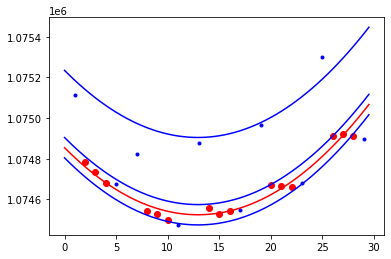

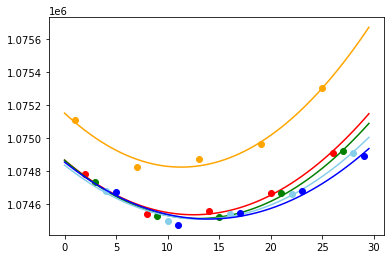

In [112]:
# B1 experiment
module = np.arange(25)
slitPos = 25 - 6 * (module // 5) + module % 5

ISOFF = np.array([
1075436,1075185,1075171,1075206,1075071,
1075091,1074865,1074880,1074879,1074790,
1074970,1074755,1074699,1074717,1074643,
1074931,1074730,1074691,1074690,1074600,
1075208,1074988,1074903,1074883,1074771
])

#ISOFF = np.array([1075555.961,
#1075063.707,1075059.833,1075045.803,1075135.813,
#1075228.373,1074836.450,1074810.766,1074802.746,
#1074908.582,1075097.961,1074742.009,1074666.447,
#1074658.951,1074763.615,1074999.963,1074615.307,
#1074754.080,1074684.898,1074748.587,1075210.780,
#1075037.725,1074817.555,1074788.777,1074885.823])
ISOFF = np.array([1075302.681,
1074913.468,1074920.658,1074912.062,1074895.791,
1074966.212,1074669.707,1074667.427,1074662.899,
1074679.293,1074876.604,1074560.278,1074526.754,
1074544.614,1074549.398,1074825.930,1074544.358,
1074527.922,1074499.803,1074476.582,1075113.276,
1074786.308,1074733.044,1074683.485,1074675.970])


blue1 = np.array([-263.92944121,  -53.59084654,    1.16697799,   51.19513828,  422.65026353,
             -189.63033763,  -33.17725668,  -19.96267952,   26.01302266,  307.31828786,
             -156.31979898,  -37.76920495,   14.25657713,    9.02851029,  216.42404114,
              -75.57154681,   28.56399698,   33.54483603,   24.91445915,  215.17805003,
             -108.48468372,  -12.59286879,    6.90170244,  -10.74710888,  175.93175233])


plt.plot(slitPos, ISOFF,'.',color='blue')

from lmfit.models import QuadraticModel
mod = QuadraticModel()
x = slitPos.copy()
y = ISOFF #+ blue1
idx = [1,2,3,6,7,8,11,12,13,16,17,18,21,22,23]
plt.plot(slitPos[idx], ISOFF[idx], 'o', color='red')
pars = mod.guess(y[idx], x=x[idx])
out = mod.fit(y[idx], pars, x=x[idx])
a,b,c = out.params['a'].value,out.params['b'].value,out.params['c'].value
x_=np.arange(0, 30, 0.5)
plt.plot(x_, a*x_**2+b*x_+c, color='red')
plt.plot(x_, a*x_**2+b*x_+c+50, color='blue')
plt.plot(x_, a*x_**2+b*x_+c-50, color='blue')
plt.plot(x_, a*x_**2+b*x_+c+380, color='blue')
plt.show()

id1 = np.arange(5)*5
mod = QuadraticModel()
for i, col in enumerate(['orange','red','green','skyblue','blue']):
    plt.plot(slitPos[id1+i], y[id1+i],'o',color=col)
    pars = mod.guess(y[id1+i], x=x[id1+i])
    out = mod.fit(y[id1+i], pars, x=x[id1+i])
    a,b,c = out.params['a'].value,out.params['b'].value,out.params['c'].value
    plt.plot(x_, a*x_**2+b*x_+c, color=col)

# Tests

In [31]:
from astropy.io import fits
rootdir = '/home/dario/FIFI-LS/Calibration/Wavelength/Reduced/'
infile = rootdir + 'R1_105_GC01_0.fits'

with fits.open(infile) as hdl:
    g = hdl['Grating Position'].data
    w = hdl['WAVE'].data
    dw = hdl['DWAVE'].data
    specs = hdl['SPECS'].data
    header = hdl[0].header
    detchan = header['CHANNEL']
    order = header['ORDER']
    dichroic = header['DICHROIC']
    obsdate = header['OBSDATE']


# Table with lines
import pandas as pd

print('channel, order ', detchan, order)

path = '/home/dario/Python/Fifilab/'
lines = pd.read_csv(path+'water'+detchan+str(order)+'.csv', delimiter=',',header=0,
                    names=['wave','fwhm_air','fwhm_h2o','ok','fwhm_isu'])

channel, order  RED 1


[146.9227 148.7078]


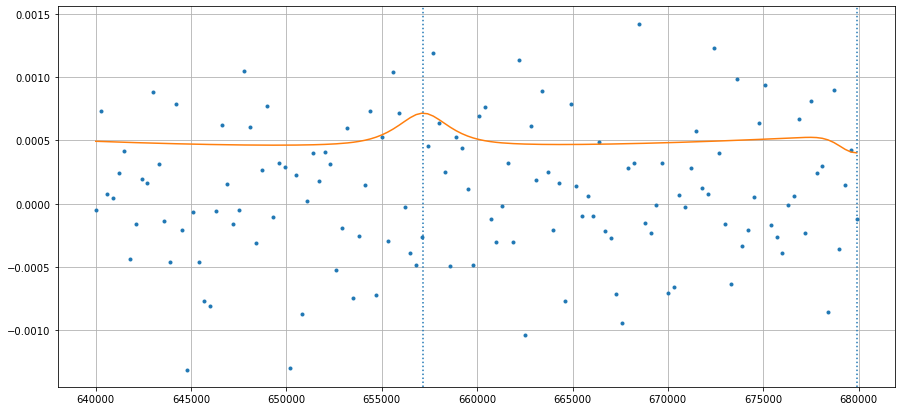

[320.1620990634692, 0]


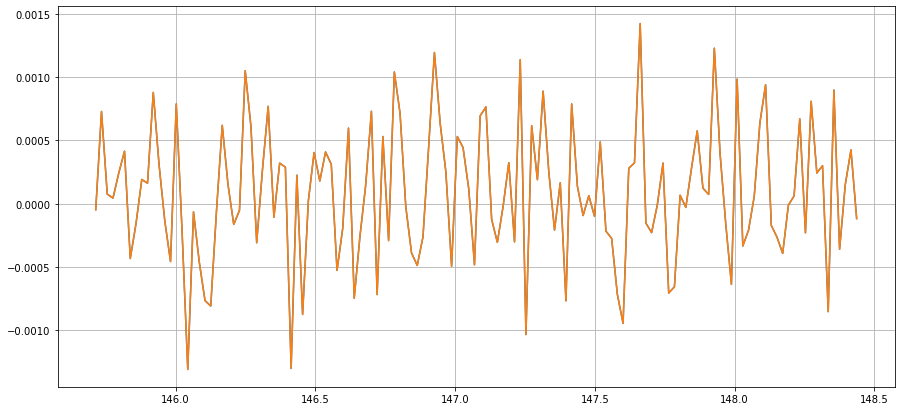

In [35]:
from fifipy.wavecal import fitLines, wlimits
%matplotlib inline
import matplotlib.pyplot as plt

# Pixel      
i = 10 # spectral pixel
j = 2 # spatial pixel
# Range of wavelengths
wcommon, wrange = wlimits(w, i)
wlines = lines.wave.values
fwhms  = lines.fwhm_isu.values
idx =  (wrange[0]-0.5 < wlines) & (wlines < wrange[1]+0.5)
print(wlines[idx])
jout, centers, errors, amplitudes, fwhms, fractions, bestfit = fitLines(wlines[idx], fwhms[idx], g, w, specs, i, j)

fig,ax = plt.subplots(figsize=(15,7))
ax.plot(g, specs[:,i,jout],'.')
ax.plot(g, bestfit)
for c in centers:
    ax.axvline(c,linestyle=':')
ax.grid()
plt.show()

print(errors)

x = w[:,j,i]
y = specs[:,i,j]
fig,ax = plt.subplots(figsize=(15,7))
plt.plot(x,y)
plt.plot(w[:,j,i], specs[:,i,j],label='spec')
plt.grid()
plt.show()

In [36]:
# Test with one file
from fifipy.wavecal import fitData
import os 
rootdir = '/home/dario/FIFI-LS/Calibration/Wavelength/Reduced/'
infile = 'B2_105_GC29_0.fits'
fitData(rootdir + infile, plot=True)

BLUE 2   Beginning of plots
Spexel  0
Spexel  1
Spexel  2
Spexel  3
Spexel  4
Spexel  5
Spexel  6
Spexel  7
Spexel  8
Spexel  9
Spexel  10
Spexel  11
Spexel  12
Spexel  13
Spexel  14
Spexel  15
End of plots.


In [113]:
# Test old 

import pandas as pd
import numpy as np
wvdf = pd.read_csv('~/Python/fifipy/fifipy/data/CalibrationResults.csv', header=[0, 1])

ndates = (len(wvdf.columns) - 2) // 4
dates = np.zeros(ndates)
for i in range(ndates):
    dates[i] = wvdf.columns[2 + i * 4][0]


g0 = np.empty((ndates, 4)) 
NP = np.empty((ndates, 4)) 
a  = np.empty((ndates, 4)) 
ISF= np.empty((ndates, 4)) 
gamma= np.empty((ndates, 4)) 
PS = np.empty((ndates, 4)) 
QOFF= np.empty((ndates, 4)) 
QS= np.empty((ndates, 4)) 
ISOFF= np.empty((ndates, 4, 25))
    
for i, date in enumerate(dates):       
    cols = range(2 + 4 * i , 2 + 4 * i + 4)
    w1 = wvdf[wvdf.columns[cols]].copy()    
    for j in range(4):
        co = w1.columns[j]
        g0[i,j] = w1.iloc[0][co]
        NP[i,j] = w1.iloc[1][co]
        a[i,j]= w1.iloc[2][co]
        ISF[i,j] = w1.iloc[3][co]
        gamma[i,j] = w1.iloc[4][co]
        PS[i,j] = w1.iloc[5][co]
        QOFF[i,j] = w1.iloc[6][co]
        QS[i,j] = w1.iloc[7][co]
        ISOFF[i,j,:] = w1.iloc[8:][co].values

In [114]:
print(np.shape(ISOFF))

(17, 4, 25)


In [115]:
print(ISOFF[10,3,:])

[1075395.45121791 1075334.04285994 1075355.54534674 1075360.68084803
 1075013.60364908 1075091.29251479 1075040.97656492 1075064.16469137
 1075061.53312395 1074757.3824828  1074978.63975476 1074912.87619749
 1074887.06447773 1074904.9647192  1074660.00108437 1074988.51541962
 1074918.59444066 1074894.56104779 1074865.32009506 1074618.52323737
 1075283.15840098 1075170.40987296 1075113.17433142 1075078.19715453
 1074788.57962221]


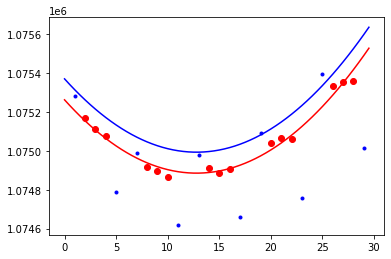

[25 26 27 28 29 19 20 21 22 23 13 14 15 16 17  7  8  9 10 11  1  2  3  4
  5]
[0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4]


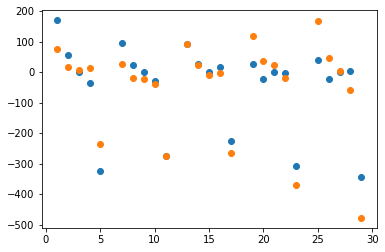

In [142]:

ISOFF_ = ISOFF[10,3,:]
module = np.arange(25)
slitPos = 25 - 6 * (module // 5) + module % 5
blue2 = np.array([-1.80111492e+02, -4.09611668e+01,  1.78797557e-02,  5.33911505e+01,
              4.51898768e+02, -1.28648267e+02, -3.41402874e+01, -2.58367960e+01,
              1.51806221e+01,  3.40600043e+02, -1.00297089e+02, -2.52445624e+01,
              4.35994998e+00,  3.34233424e+00,  2.48134145e+02, -3.43214702e+01,
              2.64531668e+01,  2.99021981e+01,  4.11197888e+01,  2.59380351e+02,
             -6.88399816e+01, -1.68668733e-01,  1.23190431e+01,  3.38400050e+00,
              2.28956503e+02])

plt.plot(slitPos, ISOFF_,'.',color='blue')
#plt.plot(slitPos, ISOFF, '.', color='red')

from lmfit.models import QuadraticModel
mod = QuadraticModel()
x = slitPos.copy()
y = ISOFF_ #+ blue2
idx = [1,2,3,6,7,8,11,12,13,16,17,18,21,22,23]
plt.plot(slitPos[idx], y[idx], 'o', color='red')
pars = mod.guess(y[idx], x=x[idx])
out = mod.fit(y[idx], pars, x=x[idx])
a,b,c = out.params['a'].value,out.params['b'].value,out.params['c'].value
x_=np.arange(0, 30, 0.5)
plt.plot(x_, a*x_**2+b*x_+c, color='red')
plt.plot(x_, a*x_**2+b*x_+c+108, color='blue')
plt.show()

xx = slitPos
print(slitPos)
print((slitPos-1)%6)

dx = (slitPos-1)%6
ix = np.arange(25)
dx = np.array([2,1,0,-1,-2]*5)
#plt.plot(slitPos, ISOFF, 'o')
x_ = slitPos.copy()
y_ = a*x_**2+b*x_+c
plt.plot(slitPos, ISOFF_ - ISOFF_[ix + dx],'o')
plt.plot(slitPos, ISOFF_ - y_,'o')


0 2.4721810480504494 -64.00798707626768 1074830.2266503081
1 2.463723144749004 -65.3050955178065 1075305.093907296
2 2.2891891994444964 -61.178623994440755 1074973.2862460872
3 2.378532178894342 -61.80743299211985 1075392.0271613635
4 2.257582217272554 -56.59167267473832 1075309.7173610772
5 2.2270937098626216 -55.33925182643037 1075427.5310697998
6 1.9237218163056646 -43.89139177119304 1075086.4434210912
7 2.270624877941619 -56.89550097479547 1075294.5381124932
8 2.224928036506884 -55.125793772715525 1075366.4000526515
9 2.290988270788073 -57.9740065903191 1075343.6741026894
10 2.097096358979009 -52.878947629506314 1075224.114104302
11 2.271014241417872 -57.86335280760152 1074964.5221524106
12 2.1627692149013877 -54.09126651561377 1074905.2276801034
13 2.1263180651974865 -51.719563767950454 1075293.4043192908
14 2.2241071447759215 -57.131174796593186 1075254.561473572
15 2.2253164956882325 -56.86498530618449 1075354.7157430728
16 2.215741049521128 -54.871314316973134 1075255.236713495

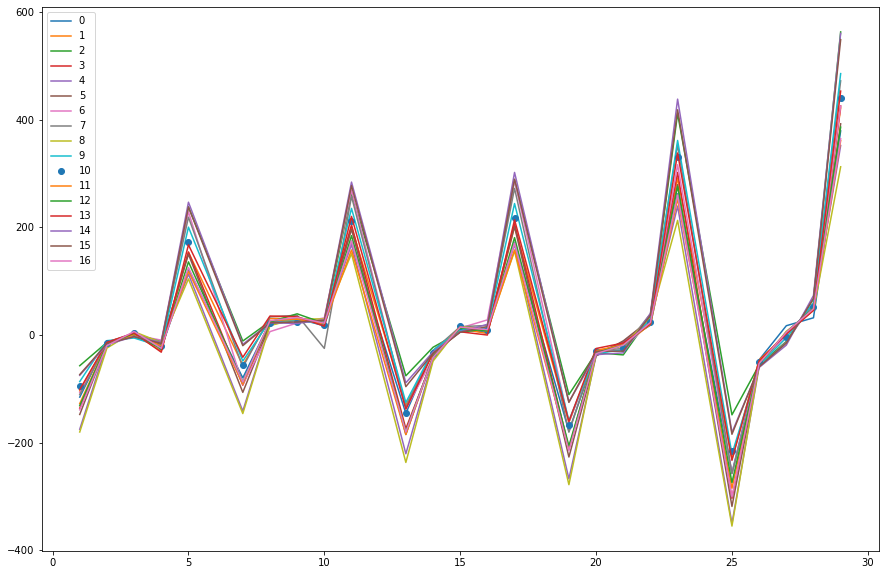

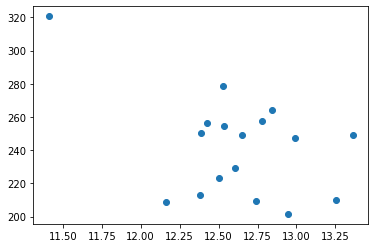

In [221]:
idx = [1,2,3,6,7,8,11,12,13,16,17,18,21,22,23]
#idx = np.arange(25)
x = slitPos.copy()
s = np.argsort(x)

j=2
a_ = []
b_ = []
c_ = []
diff = []
fig,ax = plt.subplots(figsize=(15,10))
for i in range(0,17):
    ISOFF_ = ISOFF[i,j,:]
    y = ISOFF_ #+ blue2
    pars = mod.guess(y[idx], x=x[idx])
    out = mod.fit(y[idx], pars, x=x[idx])
    a,b,c = out.params['a'].value,out.params['b'].value,out.params['c'].value
    print(i,a,b,c)
    a_.append(a)
    b_.append(b)
    c_.append(c)
    m = a*x**2+b*x+c
    
    #idm = x == 5
    #diff.append(m[idm]-ISOFF[i,j,idm])
    id5 = x == 5
    id7 = x == 7
    d5 = m[id5]-ISOFF[i,j,id5]
    d7 = m[id7] - ISOFF[i,j,id7]
    diff.append(d5-d7)
    
    if i == 10:
        plt.plot(slitPos[s], m[s]-ISOFF[i,j,s],'o',label=str(i))
    else:
        plt.plot(slitPos[s], m[s]-ISOFF[i,j,s],label=str(i))
plt.legend()
plt.show()

a_ = np.array(a_)
b_ = np.array(b_)
c_ = np.array(c_)
#plt.plot(np.arange(len(a_)),-b_/(2*a_),'o')
plt.plot(-b_/(2*a_), diff,'o')

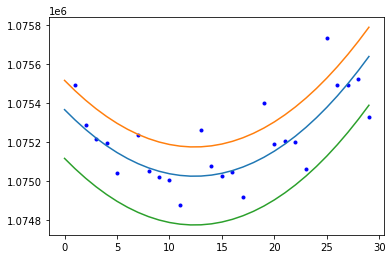

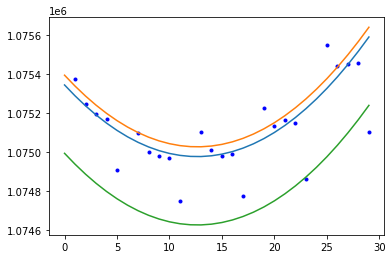

In [193]:
j=2
slitPosRed = np.array([25,26,27,28,29,
           20,20.5,21.5,22.2,23.2,
          12,13,14,15,16,
          7,8,9,10,11,
          1,2,3,4,5])

slitPos = 25 - 6 * (module // 5) + module % 5
idx = np.arange(25)
idx = [1,2,3,6,7,8,11,12,13,16,17,18,21,22,23]
y = ISOFF[8,j,:]
plt.plot(slitPos, y,'.',color='blue')
pars = mod.guess(y[idx], x=x[idx])
out = mod.fit(y[idx], pars, x=x[idx])
a,b,c = out.params['a'].value,out.params['b'].value,out.params['c'].value
xx= np.arange(0,30)
m = a*xx**2+b*xx+c
plt.plot(xx,m)
plt.plot(xx,m+50+100)
plt.plot(xx,m-350+100)
plt.show()
y = ISOFF[9,j,:]
plt.plot(slitPos, y,'.',color='blue')
pars = mod.guess(y[idx], x=x[idx])
out = mod.fit(y[idx], pars, x=x[idx])
a,b,c = out.params['a'].value,out.params['b'].value,out.params['c'].value
xx= np.arange(0,30)
m = a*xx**2+b*xx+c
plt.plot(xx,m)
plt.plot(xx,m+50)
plt.plot(xx,m-350)

In [186]:
print(slitPos)
slitPos = np.array([25,26,27,28,29,
           20,20.5,21.5,22.2,23.2,
          12,13,14,15,16,
          7,8,9,10,11,
          1,2,3,4,5])

[25 26 27 28 29 19 20 21 22 23 13 14 15 16 17  7  8  9 10 11  1  2  3  4
  5]
